# Analyse des distributions de Lexique 3.80

In [1]:
import codecs,math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
from datetime import datetime
from IPython.display import display

In [2]:
%matplotlib inline

#### Choix du style de plot

In [3]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
#sns.palplot(sns.color_palette("hls", 8))
#sns.palplot(sns.color_palette("husl", 8))

### Routines de formatages des axes matplotlib

In [4]:
def reFormatTicks(x,pos):
    text="0"
    if x!=0:
        magnitude=int(np.log10(x))
        x=round(float(x)/(10**magnitude),1)*10**magnitude
        if magnitude>=9:
            unit="G"
            value=("%.1f"%(float(x)/1e9)).strip("0").strip(".")
        elif magnitude>=6:
            unit="M"
            value=("%.1f"%(float(x)/1e6)).strip("0").strip(".")
        elif magnitude>=3:
            unit="k"
            value=("%.1f"%(float(x)/1e3)).strip("0").strip(".")
        else:
            unit=""
            value=("%.1f"%float(x)).strip("0").strip(".")
        text="%s%s"%(value,unit)
    return text

def Mois2Annees(x,pos):
    return int(x/12)


## Lecture de Lexique3
1. lecture dans un DF *Lexique3*
1. extraction des colonnes pertinentes *lex3*

In [5]:
repHDR="/Users/gilles/ownCloud/Recherche/Boye/HDR/Memoire/figs/"
nomLexiqueOrg="/Users/gilles/ownCloud/Python/phonemisation/Lexique380-UTF8.txt"
nomRepertoire="/Volumes/BroadDisk/Copies-iMac-GB/Python/phonemisation/"
nomLexiqueOrg=nomRepertoire+"Lexique380-UTF8.txt"
Lexique3=pd.read_csv(nomLexiqueOrg,sep="\t")

In [6]:
Lexique3.head()

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,...,26_orthrenv,27_phonrenv,28_orthosyll,29_cgramortho,30_deflem,31_defobs,32_old20,33_pld20,34_morphoder,35_nbmorph
0,a,a,a,NOM,m,NaN,81.36,58.65,81.36,58.65,...,a,a,a,"NOM,AUX,VER",NaN,NaN,1.00,1.00,a,1.0
1,a,a,avoir,AUX,NaN,NaN,18559.22,12800.81,6350.91,2926.69,...,a,a,a,"NOM,AUX,VER",NaN,NaN,1.00,1.00,avoir,1.0
2,a,a,avoir,VER,NaN,NaN,13572.40,6426.49,5498.34,1669.39,...,a,a,a,"NOM,AUX,VER",93.0,16.0,1.00,1.00,avoir,1.0
3,a capella,akapEla,a capella,ADV,NaN,NaN,0.04,0.07,0.04,0.07,...,allepac a,alEpaka,a ca-pel-la,ADV,NaN,NaN,3.85,2.85,a-capella,2.0
4,a cappella,akapEla,a cappella,ADV,NaN,NaN,0.04,0.07,0.04,0.07,...,alleppac a,alEpaka,a cap-pel-la,ADV,NaN,NaN,4.60,2.85,a-cappella,2.0


In [7]:
categories=u"verbes noms adjectifs adverbes pronoms déterminants prépositions conjonctions autres".split(" ")
cgrams={
    u"verbes":["VER","AUX"],
    u"noms":["NOM"],
    u"adjectifs":["ADJ"],
    u"adverbes":["ADV"],
    u"déterminants":['ART:def', 'ADJ:ind', 'ADJ:num', 'ADJ:dem', 'ART:ind', 'ADJ:pos', 'ADJ:int'],
    u"prépositions":["PRE"],
    u"conjonctions":["CON"],
    u"pronoms":['PRO:ind', 'PRO:int', 'PRO:rel', 'PRO:dem', 'PRO:per', 'PRO:pos'],
    u"autres":['ONO', 'LIA']
}
catLex=cgrams["verbes"]+cgrams["noms"]+cgrams["adjectifs"]+cgrams["adverbes"]
catNonLex=cgrams[u"déterminants"]+cgrams[u"prépositions"]+cgrams["conjonctions"]+cgrams["pronoms"]+cgrams["autres"]


In [8]:
Lexique3.columns

Index([u'1_ortho', u'2_phon', u'3_lemme', u'4_cgram', u'5_genre', u'6_nombre',
       u'7_freqlemfilms2', u'8_freqlemlivres', u'9_freqfilms2',
       u'10_freqlivres', u'11_infover', u'12_nbhomogr', u'13_nbhomoph',
       u'14_islem', u'15_nblettres', u'16_nbphons', u'17_cvcv', u'18_p_cvcv',
       u'19_voisorth', u'20_voisphon', u'21_puorth', u'22_puphon', u'23_syll',
       u'24_nbsyll', u'25_cv-cv', u'26_orthrenv', u'27_phonrenv',
       u'28_orthosyll', u'29_cgramortho', u'30_deflem', u'31_defobs',
       u'32_old20', u'33_pld20', u'34_morphoder', u'35_nbmorph'],
      dtype='object')

In [9]:
lex3=Lexique3[["1_ortho","2_phon","3_lemme","4_cgram","5_genre","6_nombre","7_freqlemfilms2","8_freqlemlivres","9_freqfilms2","10_freqlivres","11_infover"]].copy()

In [10]:
Lexique3=None

In [11]:
lex3.loc[:,"7_freqlemfilms2"]=lex3.loc[:,"7_freqlemfilms2"].astype(float)
lex3.loc[:,"8_freqlemlivres"]=lex3.loc[:,"8_freqlemlivres"].astype(float)
lex3.loc[:,"9_freqfilms2"]=lex3.loc[:,"9_freqfilms2"].astype(float)
lex3.loc[:,"10_freqlivres"]=lex3.loc[:,"10_freqlivres"].astype(float)
lex3[["1_ortho","3_lemme","9_freqfilms2"]].head()

,1_ortho,3_lemme,9_freqfilms2
0,a,a,81.36
1,a,avoir,6350.91
2,a,avoir,5498.34
3,a capella,a capella,0.04
4,a cappella,a cappella,0.04


### Comptages des catégories

## Proportions des catégories dans les fréquences de formes

In [15]:
proportionsCgramFilms=[]
nbFormesCgramFilms=[]
lex3FreqFilms2Sum=lex3["9_freqfilms2"].sum()
lex3FormFilms2Sum=lex3[lex3["9_freqfilms2"]>0]["9_freqfilms2"].count()
for c in categories:
    proportionFilms=lex3[lex3["4_cgram"].isin(cgrams[c])]["9_freqfilms2"].sum()/lex3FreqFilms2Sum
    proportionsCgramFilms.append([c,proportionFilms])
    nbFormesFilms=lex3[(lex3["4_cgram"].isin(cgrams[c]))&(lex3["9_freqfilms2"]>0)]["9_freqfilms2"].count()
    nbFormesCgramFilms.append([c,nbFormesFilms])
nbFormesCgramFilms

[[u'verbes', 48370],
 [u'noms', 37440],
 [u'adjectifs', 20941],
 [u'adverbes', 1366],
 [u'pronoms', 161],
 [u'd\xe9terminants', 205],
 [u'pr\xe9positions', 71],
 [u'conjonctions', 35],
 [u'autres', 206]]

In [14]:
proportionsCgramTextes=[]
nbFormesCgramTextes=[]
lex3FreqTextes2Sum=lex3["10_freqlivres"].sum()
lex3FormTextes2Sum=lex3[lex3["10_freqlivres"]>0]["10_freqlivres"].count()
for c in categories:
    proportionTextes=lex3[lex3["4_cgram"].isin(cgrams[c])]["10_freqlivres"].sum()/lex3FreqTextes2Sum
    proportionsCgramTextes.append([c,proportionTextes])
    nbFormesTextes=lex3[(lex3["4_cgram"].isin(cgrams[c]))&(lex3["10_freqlivres"]>0)]["10_freqlivres"].count()
    nbFormesCgramTextes.append([c,nbFormesTextes])
nbFormesCgramTextes

[[u'verbes', 55179],
 [u'noms', 40613],
 [u'adjectifs', 23126],
 [u'adverbes', 1683],
 [u'pronoms', 162],
 [u'd\xe9terminants', 200],
 [u'pr\xe9positions', 78],
 [u'conjonctions', 30],
 [u'autres', 225]]

## Analyse de Lexique3

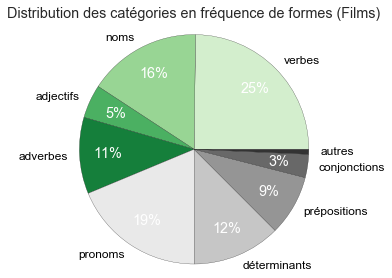

In [21]:
DFAX=pd.DataFrame(proportionsCgramFilms,columns=["cat","prop"]).set_index("cat")
ax=DFAX.plot(kind="pie",y="prop",
             labels=DFAX.index,
             autopct=lambda p: '%1d%%'%round(p) if round(p) > 1 else '',
             pctdistance = 0.75, 
             textprops=dict(color="black",),
             colors=sns.color_palette("Greens", 4)+sns.color_palette("Greys", 5),
            )
for text in ax.texts:
    if "%" in text.get_text():
        text.set_color('white')
ax.set_title(u"Distribution des catégories en fréquence de formes (Films)",y=1.05)
ax.axis('equal')
ax.set(ylabel="")
ax.get_legend().remove()
#ax.legend(labels=DFAX.index,
#          title=u"Catégories",
#          loc="center right",
#          bbox_to_anchor=(.75, 0, 0.5, 1))
plt.tight_layout()
plt.savefig(repHDR+u'Lex3-FrequenceCategorie-Films.png', dpi=300, bbox_inches="tight")
plt.show()

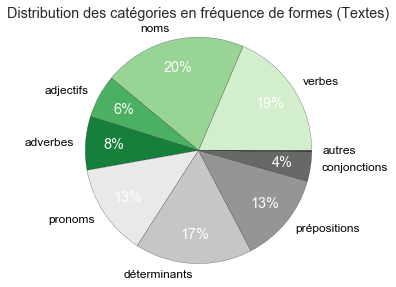

In [24]:
DFAX=pd.DataFrame(proportionsCgramTextes,columns=["cat","prop"]).set_index("cat")
ax=DFAX.plot(kind="pie",y="prop",
             labels=DFAX.index,
             autopct=lambda p: '%1d%%'%round(p) if round(p) > 1 else '',
             pctdistance = 0.75, 
             textprops=dict(color="black",),
             colors=sns.color_palette("Greens", 4)+sns.color_palette("Greys", 5),
            )
for text in ax.texts:
    if "%" in text.get_text():
        text.set_color('white')
ax.set_title(u"Distribution des catégories en fréquence de formes (Textes)",y=1.05)
ax.axis('equal')
ax.set(ylabel="")
ax.get_legend().remove()
#ax.legend(labels=DFAX.index,
#          title=u"Catégories",
#          loc="center right",
#          bbox_to_anchor=(.75, 0, 0.5, 1))
plt.tight_layout()
plt.savefig(repHDR+u'Lex3-FrequenceCategorie-Textes.png', dpi=300, bbox_inches="tight")
plt.show()

#### Ajout du rang pour les formes

In [25]:
lex3.loc[lex3["9_freqfilms2"]>0,"rangFW"]=lex3.loc[lex3["9_freqfilms2"]>0,"9_freqfilms2"].rank(ascending=False)
lex3.loc[lex3["10_freqlivres"]>0,"rangTW"]=lex3.loc[lex3["10_freqlivres"]>0,"10_freqlivres"].rank(ascending=False)
lex3[(lex3["4_cgram"].isin(catNonLex))&(lex3["9_freqfilms2"]>0)].sort_values("rangFW",ascending=True)

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,11_infover,rangFW,rangTW
74319,je,Z2,je,PRO:per,NaN,s,25983.20,10862.77,25983.20,10862.77,NaN,1.0,11.0
35278,de,d2,de,PRE,NaN,NaN,25220.86,38928.92,25220.86,38928.92,NaN,2.0,1.0
75471,la,la,la,ART:def,f,s,14946.48,23633.92,14946.48,23633.92,NaN,5.0,2.0
132592,tu,ty,tu,PRO:per,NaN,s,14661.76,2537.03,14661.76,2537.03,NaN,6.0,50.0
76448,le,l2,le,ART:def,m,s,13652.76,18310.95,13652.76,18310.95,NaN,7.0,5.0
136706,vous,vu,vous,PRO:per,NaN,p,13589.70,3507.16,13589.70,3507.16,NaN,8.0,39.0
68080,il,il,il,PRO:per,m,s,13222.93,15832.09,13222.93,15832.09,NaN,10.0,6.0
52787,et,e,et,CON,NaN,NaN,12909.08,20879.73,12909.08,20879.73,NaN,11.0,3.0
137701,à,a,à,PRE,NaN,NaN,12190.40,19209.05,12190.40,19209.05,NaN,12.0,4.0
133517,un,1,un,ART:ind,m,s,12087.62,13550.68,12087.62,13550.68,NaN,13.0,8.0


## Ajouter une discussion des différences de rang entre Films et Textes

### Graphes Fréquence=f(Rang)

#### Distribution de la fréquence des formes dans Films

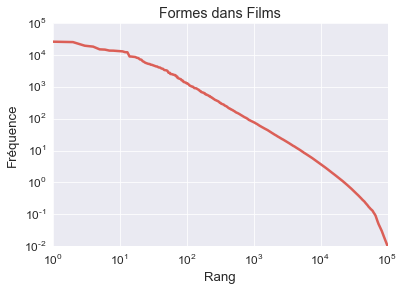

In [26]:
ax=lex3[lex3["9_freqfilms2"]>0].sort_values("rangFW").set_index("rangFW")["9_freqfilms2"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title="Formes dans Films")
None

Le graphe Fréquence/Rang pour le corpus Films n'est pas une simple droite à coefficient directeur constant. La tête de la distribution et la queue ont des coefficients directeurs très différents.

#### Distribution de la fréquence des formes dans Textes

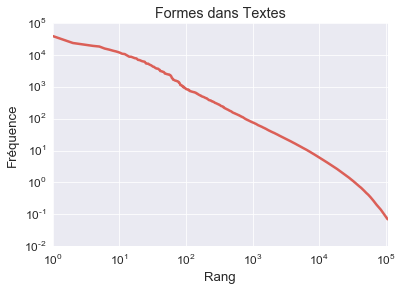

In [27]:
ax=lex3[lex3["10_freqlivres"]>0].sort_values("rangTW").set_index("rangTW")["10_freqlivres"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title="Formes dans Textes")
None

Pour le corpus Textes aussi, les coefficients directeurs varient en fonction du rang.

#### Extraction des fréquences de lexèmes

In [28]:
lex3Lemmes=lex3.drop_duplicates(subset=["3_lemme","4_cgram","7_freqlemfilms2","8_freqlemlivres"]).copy()
lex3Lemmes.loc[lex3Lemmes["7_freqlemfilms2"]>0,"rangFL"]=lex3Lemmes.loc[lex3Lemmes["7_freqlemfilms2"]>0,"7_freqlemfilms2"].rank(ascending=False)
lex3Lemmes.loc[lex3Lemmes["8_freqlemlivres"]>0,"rangTL"]=lex3Lemmes.loc[lex3Lemmes["8_freqlemlivres"]>0,"8_freqlemlivres"].rank(ascending=False)
lex3Lemmes.sort_values("rangTL")

,1_ortho,2_phon,3_lemme,4_cgram,5_genre,6_nombre,7_freqlemfilms2,8_freqlemlivres,9_freqfilms2,10_freqlivres,11_infover,rangFW,rangTW,rangFL,rangTL
35278,de,d2,de,PRE,NaN,NaN,25220.86,38928.92,25220.86,38928.92,NaN,2.0,1.0,3.0,1.0
75471,la,la,la,ART:def,f,s,14946.48,23633.92,14946.48,23633.92,NaN,5.0,2.0,7.0,2.0
52787,et,e,et,CON,NaN,NaN,12909.08,20879.73,12909.08,20879.73,NaN,11.0,3.0,13.0,3.0
137701,à,a,à,PRE,NaN,NaN,12190.40,19209.05,12190.40,19209.05,NaN,12.0,4.0,14.0,4.0
76448,le,l2,le,ART:def,m,s,13652.76,18310.95,13652.76,18310.95,NaN,7.0,5.0,9.0,5.0
68080,il,il,il,PRO:per,m,s,13222.93,15832.09,13222.93,15832.09,NaN,10.0,6.0,12.0,6.0
52031,es,E,être,VER,NaN,NaN,32236.50,15085.47,1849.07,256.62,ind:pre:2s;,75.0,330.0,1.0,7.0
76505,les,le,les,ART:def,NaN,p,8720.38,14662.30,8720.38,14662.30,NaN,16.0,7.0,19.0,8.0
86465,n,En,ne,ADV,NaN,NaN,22287.83,13841.89,70.36,5.68,NaN,1085.5,10514.5,4.0,9.0
133517,un,1,un,ART:ind,m,s,12087.62,13550.68,12087.62,13550.68,NaN,13.0,8.0,15.0,10.0


In [30]:
nbLemmesFilms=[]
for c in categories:
    nb=lex3Lemmes[(lex3Lemmes["7_freqlemfilms2"]>0) & (lex3Lemmes["4_cgram"].isin(cgrams[c]))]["4_cgram"].count()
    nbLemmesFilms.append(nb)
nbLemmesFilms

[5359, 24381, 9387, 1360, 161, 205, 71, 35, 206]

In [31]:
nbLemmesTextes=[]
for c in categories:
    nb=lex3Lemmes[(lex3Lemmes["8_freqlemlivres"]>0) & (lex3Lemmes["4_cgram"].isin(cgrams[c]))]["4_cgram"].count()
    nbLemmesTextes.append(nb)
nbLemmesTextes

[5873, 25442, 9915, 1677, 162, 200, 78, 30, 225]

Discuter des différences entre le nombre de lemmes pour Films et Textes.

# Distribution des fréquences pour Films

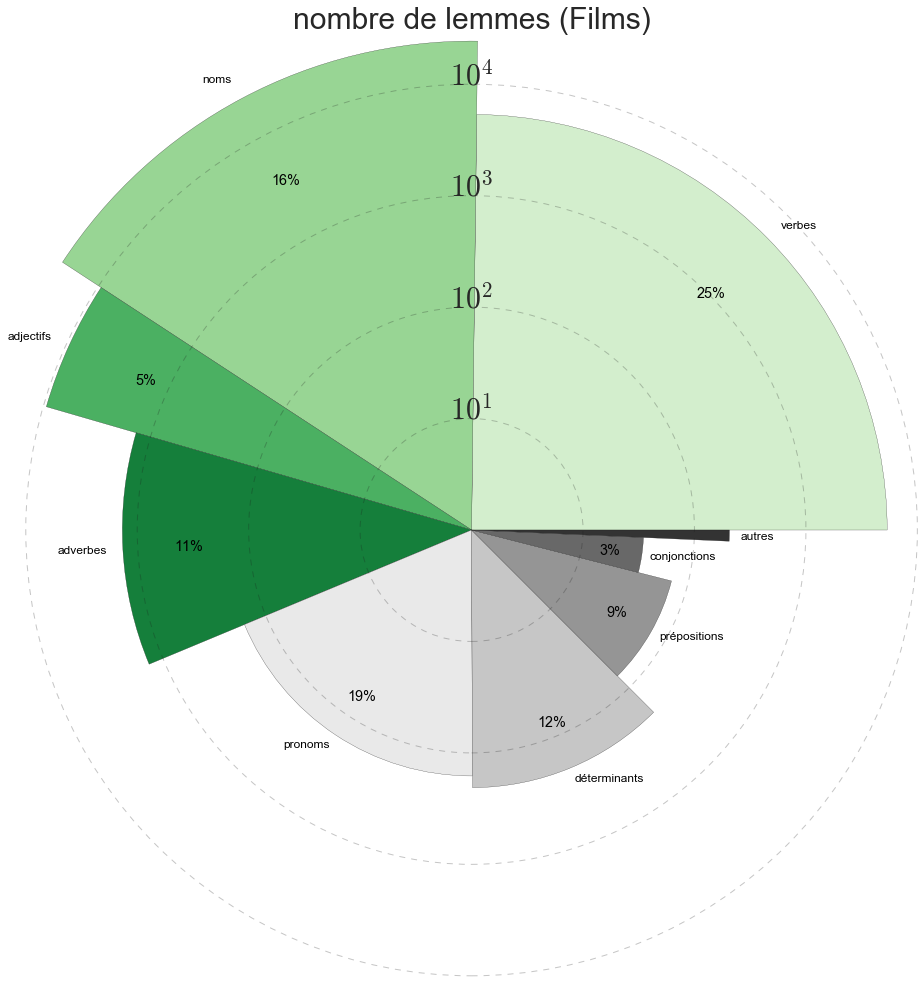

In [33]:
DFAX=pd.DataFrame(proportionsCgramFilms,columns=["cat","prop"]).set_index("cat")
DFAX["nbLemmes"]=nbLemmesFilms
props=DFAX["prop"].tolist()
#lemmes=[7000,12000,7000,3500,50,150,250,50,100]
heights=[]
for n,l in enumerate(nbLemmesFilms):
    height=math.log(l,10)
    heights.append(height)
    
ax=DFAX.plot(kind="pie",y="prop",#figsize=(5,5),
             labels=DFAX.index,
#             labeldistance=5,
             autopct=lambda p: '%1d%%'%round(p) if round(p) > 1 else '',
             startangle=0,
#             pctdistance = np.mean(heights), 
             textprops=dict(color="black",),
             colors=sns.color_palette("Greens", 4)+sns.color_palette("Greys", 5),
            )
for n,wedge in enumerate(ax.patches):
    wedge.set_radius(heights[n])
nTexte=0
labAdjust=.95
pctAdjust=1.35
for text in ax.texts:
#    text.set_fontsize(32)
    if "%" not in text.get_text() and text.get_text()!="":
        x,y=text.get_position()
        text.set_position((x*heights[nTexte]*labAdjust,y*heights[nTexte]*labAdjust))
    elif text.get_text()!="":
        x,y=text.get_position()
        text.set_position((x*heights[nTexte]*pctAdjust,y*heights[nTexte]*pctAdjust))
        nTexte+=1
ax.get_legend().remove()
ax.axis('equal')
ax.annotate(r"$10^1$", xy=(0, 1), fontsize=30, ha="center",annotation_clip=False)
ax.annotate(r"$10^2$", xy=(0, 2), fontsize=30, ha="center",annotation_clip=False)
ax.annotate(r"$10^3$", xy=(0, 3), fontsize=30, ha="center",annotation_clip=False)
ax.annotate(r"$10^4$", xy=(0, 4), fontsize=30, ha="center",annotation_clip=False)
ax.annotate(u"nombre de lemmes (Films)", xy=(0, 4.5), fontsize=30, ha="center",annotation_clip=False)
#
# Attention :
#   Pour obtenir un cercle vide : fc="none", pas fc=None
#
circle1 = plt.Circle((0,0),1,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle2 = plt.Circle((0,0),2,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle3 = plt.Circle((0,0),3,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle4 = plt.Circle((0,0),4,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
fig = plt.gcf()
fig.gca().add_artist(circle1)
fig.gca().add_artist(circle2)
fig.gca().add_artist(circle3)
fig.gca().add_artist(circle4)
plt.savefig(repHDR+u'Lex3-Catégorie-FréquencePopulation-Films.png', dpi=300, bbox_inches="tight")
plt.show()

In [34]:
DFAY=DFAX.copy()
DFAY=DFAY.append(DFAY.loc[['pronoms', u'déterminants',u'prépositions',u"conjonctions",u"autres"]].sum(), ignore_index=True).drop(DFAY.index.get_indexer(['pronoms', u'déterminants',u'prépositions',u"conjonctions",u"autres"]))
DFAY.index=u"verbes noms adjectifs adverbes grammèmes".split(" ")
DFAY

,prop,nbLemmes
verbes,0.248039,5359.0
noms,0.159714,24381.0
adjectifs,0.047332,9387.0
adverbes,0.107685,1360.0
grammèmes,0.437229,678.0


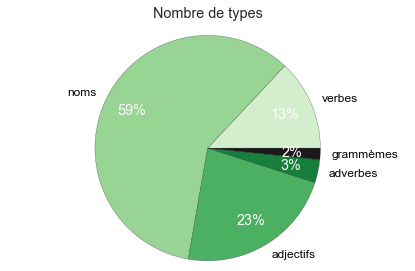

In [35]:
ax=DFAY.plot(kind="pie",y="nbLemmes",#figsize=(5,5),
             labels=DFAY.index,
#             labeldistance=5,
             autopct=lambda p: '%1d%%'%round(p) if round(p) > 1 else '',
             startangle=0,
             pctdistance = .75, 
             textprops=dict(color="black",),
             colors=sns.color_palette("Greens", 4)+["k"],
            )
for text in ax.texts:
    if "%" in text.get_text():
        text.set_color('w')
#        text.set_fontweight("heavy")
#        text.set_fontsize("large")
ax.set_title(u"Nombre de types",y=1.05)
ax.axis('equal')
ax.set(ylabel="")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig(repHDR+u'Lex3-PopulationCategorie.png', dpi=300, bbox_inches="tight")
plt.show()

2.48038958521
1.59714031463
0.473315150248
1.07685152559
4.372290197


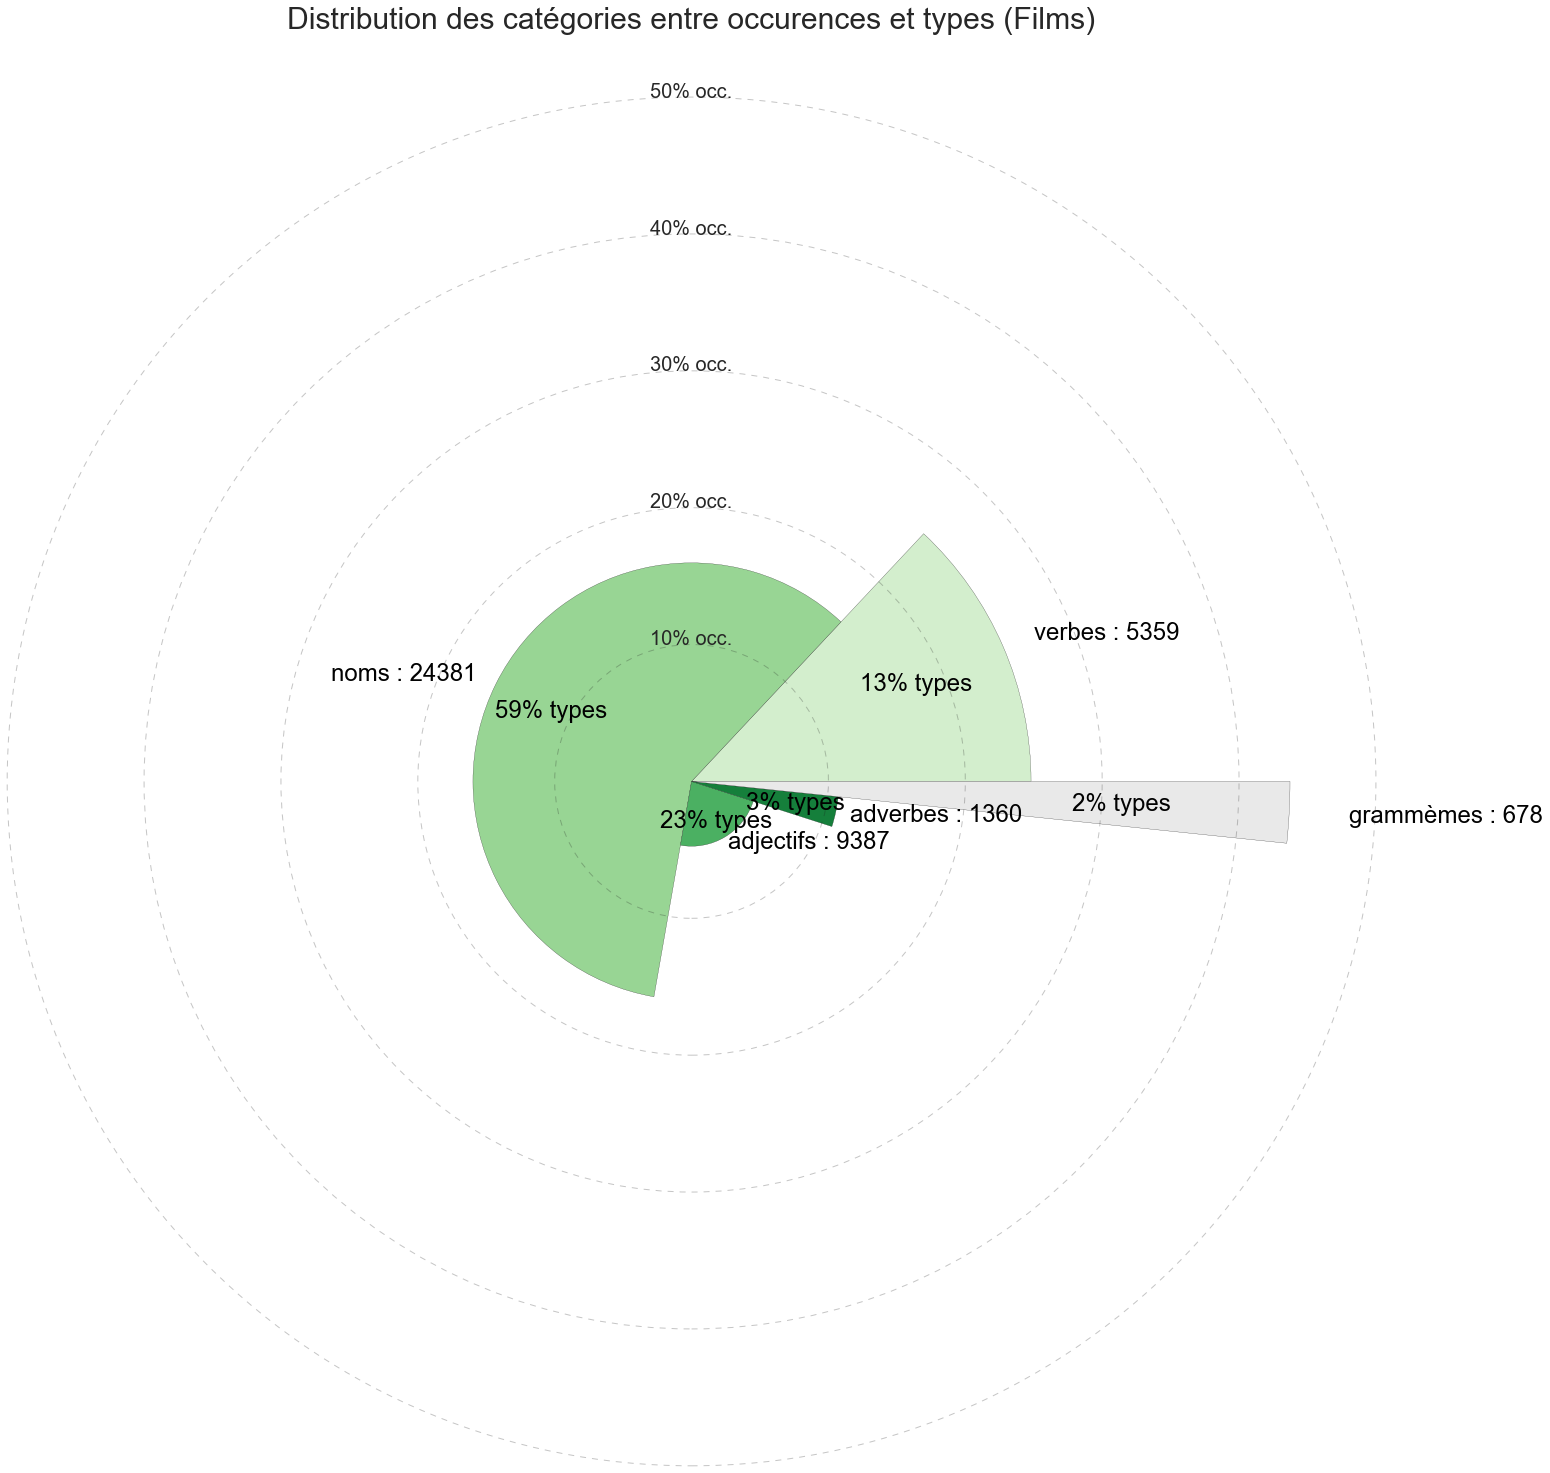

In [42]:
props=DFAY["prop"].tolist()
#lemmes=[7000,12000,7000,3500,50,150,250,50,100]
heights=[]
for n,p in enumerate(props):
    height=p*10
    print height
    heights.append(height)
    
ax=DFAY.plot(kind="pie",y="nbLemmes",figsize=(5,5),
             labels=['%s : %1d' % (l, s) for l, s in zip(DFAY.index, DFAY["nbLemmes"])],
#             labeldistance=5,
             autopct=lambda p: '%1d%% types'%round(p) if round(p) > 1 else '',
             startangle=0,
#             pctdistance = np.mean(heights), 
             textprops=dict(color="black",),
             colors=sns.color_palette("Greens", 4)+sns.color_palette("Greys", 5),
            )
for n,wedge in enumerate(ax.patches):
    wedge.set_radius(heights[n])
nTexte=0
labAdjust=1.
pctAdjust=1.2
for text in ax.texts:
    text.set_fontsize(24)
    if "%" not in text.get_text() and text.get_text()!="":
        x,y=text.get_position()
        text.set_position((x*heights[nTexte]*labAdjust,y*heights[nTexte]*labAdjust))
    elif text.get_text()!="":
        x,y=text.get_position()
        text.set_position((x*heights[nTexte]*pctAdjust,y*heights[nTexte]*pctAdjust))
        nTexte+=1
ax.get_legend().remove()
ax.axis('equal')
ax.annotate("10% occ.", xy=(0, 1), fontsize=20, ha="center",annotation_clip=False)
ax.annotate("20% occ.", xy=(0, 2), fontsize=20, ha="center",annotation_clip=False)
ax.annotate("30% occ.", xy=(0, 3), fontsize=20, ha="center",annotation_clip=False)
ax.annotate("40% occ.", xy=(0, 4), fontsize=20, ha="center",annotation_clip=False)
ax.annotate("50% occ.", xy=(0, 5), fontsize=20, ha="center",annotation_clip=False)
ax.annotate(u"Distribution des catégories entre occurences et types (Films)", xy=(0, 5.5), fontsize=30, ha="center",annotation_clip=False)
#
# Attention :
#   Pour obtenir un cercle vide : fc="none", pas fc=None
#
circle1 = plt.Circle((0,0),1,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle2 = plt.Circle((0,0),2,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle3 = plt.Circle((0,0),3,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle4 = plt.Circle((0,0),4,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle5 = plt.Circle((0,0),5,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
fig = plt.gcf()
fig.gca().add_artist(circle1)
fig.gca().add_artist(circle2)
fig.gca().add_artist(circle3)
fig.gca().add_artist(circle4)
fig.gca().add_artist(circle5)
plt.savefig(repHDR+u'Lex3-Categorie-PopulationFrequence-Films.png', dpi=300, bbox_inches="tight")
plt.show()

# Distribution des fréquences pour Textes

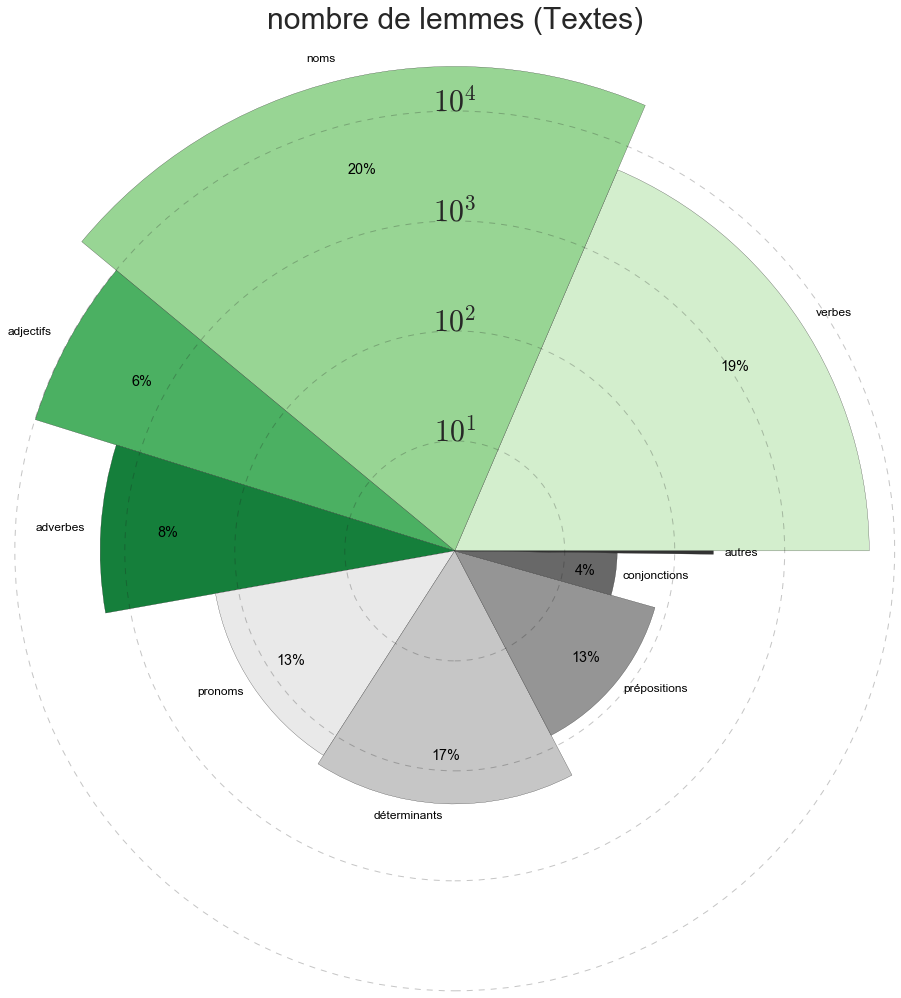

In [45]:
DFAX=pd.DataFrame(proportionsCgramTextes,columns=["cat","prop"]).set_index("cat")
DFAX["nbLemmes"]=nbLemmesTextes
props=DFAX["prop"].tolist()
#lemmes=[7000,12000,7000,3500,50,150,250,50,100]
heights=[]
for n,l in enumerate(nbLemmesTextes):
    height=math.log(l,10)
    heights.append(height)
    
ax=DFAX.plot(kind="pie",y="prop",#figsize=(5,5),
             labels=DFAX.index,
#             labeldistance=5,
             autopct=lambda p: '%1d%%'%round(p) if round(p) > 1 else '',
             startangle=0,
#             pctdistance = np.mean(heights), 
             textprops=dict(color="black",),
             colors=sns.color_palette("Greens", 4)+sns.color_palette("Greys", 5),
            )
for n,wedge in enumerate(ax.patches):
    wedge.set_radius(heights[n])
nTexte=0
labAdjust=.95
pctAdjust=1.35
for text in ax.texts:
#    text.set_fontsize(32)
    if "%" not in text.get_text() and text.get_text()!="":
        x,y=text.get_position()
        text.set_position((x*heights[nTexte]*labAdjust,y*heights[nTexte]*labAdjust))
    elif text.get_text()!="":
        x,y=text.get_position()
        text.set_position((x*heights[nTexte]*pctAdjust,y*heights[nTexte]*pctAdjust))
        nTexte+=1
ax.get_legend().remove()
ax.axis('equal')
ax.annotate(r"$10^1$", xy=(0, 1), fontsize=30, ha="center",annotation_clip=False)
ax.annotate(r"$10^2$", xy=(0, 2), fontsize=30, ha="center",annotation_clip=False)
ax.annotate(r"$10^3$", xy=(0, 3), fontsize=30, ha="center",annotation_clip=False)
ax.annotate(r"$10^4$", xy=(0, 4), fontsize=30, ha="center",annotation_clip=False)
ax.annotate(u"nombre de lemmes (Textes)", xy=(0, 4.75), fontsize=30, ha="center",annotation_clip=False)
#
# Attention :
#   Pour obtenir un cercle vide : fc="none", pas fc=None
#
circle1 = plt.Circle((0,0),1,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle2 = plt.Circle((0,0),2,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle3 = plt.Circle((0,0),3,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle4 = plt.Circle((0,0),4,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
fig = plt.gcf()
fig.gca().add_artist(circle1)
fig.gca().add_artist(circle2)
fig.gca().add_artist(circle3)
fig.gca().add_artist(circle4)
plt.savefig(repHDR+u'Lex3-Catégorie-FréquencePopulation-Textes.png', dpi=300, bbox_inches="tight")
plt.show()

In [46]:
DFAY=DFAX.copy()
DFAY=DFAY.append(DFAY.loc[['pronoms', u'déterminants',u'prépositions',u"conjonctions",u"autres"]].sum(), ignore_index=True).drop(DFAY.index.get_indexer(['pronoms', u'déterminants',u'prépositions',u"conjonctions",u"autres"]))
DFAY.index=u"verbes noms adjectifs adverbes grammèmes".split(" ")
DFAY

,prop,nbLemmes
verbes,0.185675,5873.0
noms,0.204154,25442.0
adjectifs,0.061888,9915.0
adverbes,0.076334,1677.0
grammèmes,0.471948,695.0


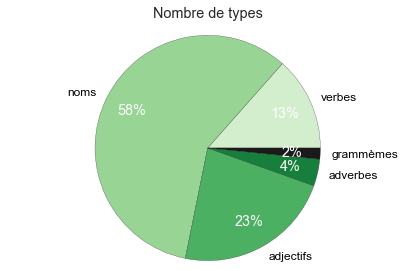

In [47]:
ax=DFAY.plot(kind="pie",y="nbLemmes",#figsize=(5,5),
             labels=DFAY.index,
#             labeldistance=5,
             autopct=lambda p: '%1d%%'%round(p) if round(p) > 1 else '',
             startangle=0,
             pctdistance = .75, 
             textprops=dict(color="black",),
             colors=sns.color_palette("Greens", 4)+["k"],
            )
for text in ax.texts:
    if "%" in text.get_text():
        text.set_color('w')
#        text.set_fontweight("heavy")
#        text.set_fontsize("large")
ax.set_title(u"Nombre de types",y=1.05)
ax.axis('equal')
ax.set(ylabel="")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig(repHDR+u'Lex3-PopulationCategorie.png', dpi=300, bbox_inches="tight")
plt.show()

1.85675140122
2.041543099
0.618884957225
0.763343392982
4.71947714957


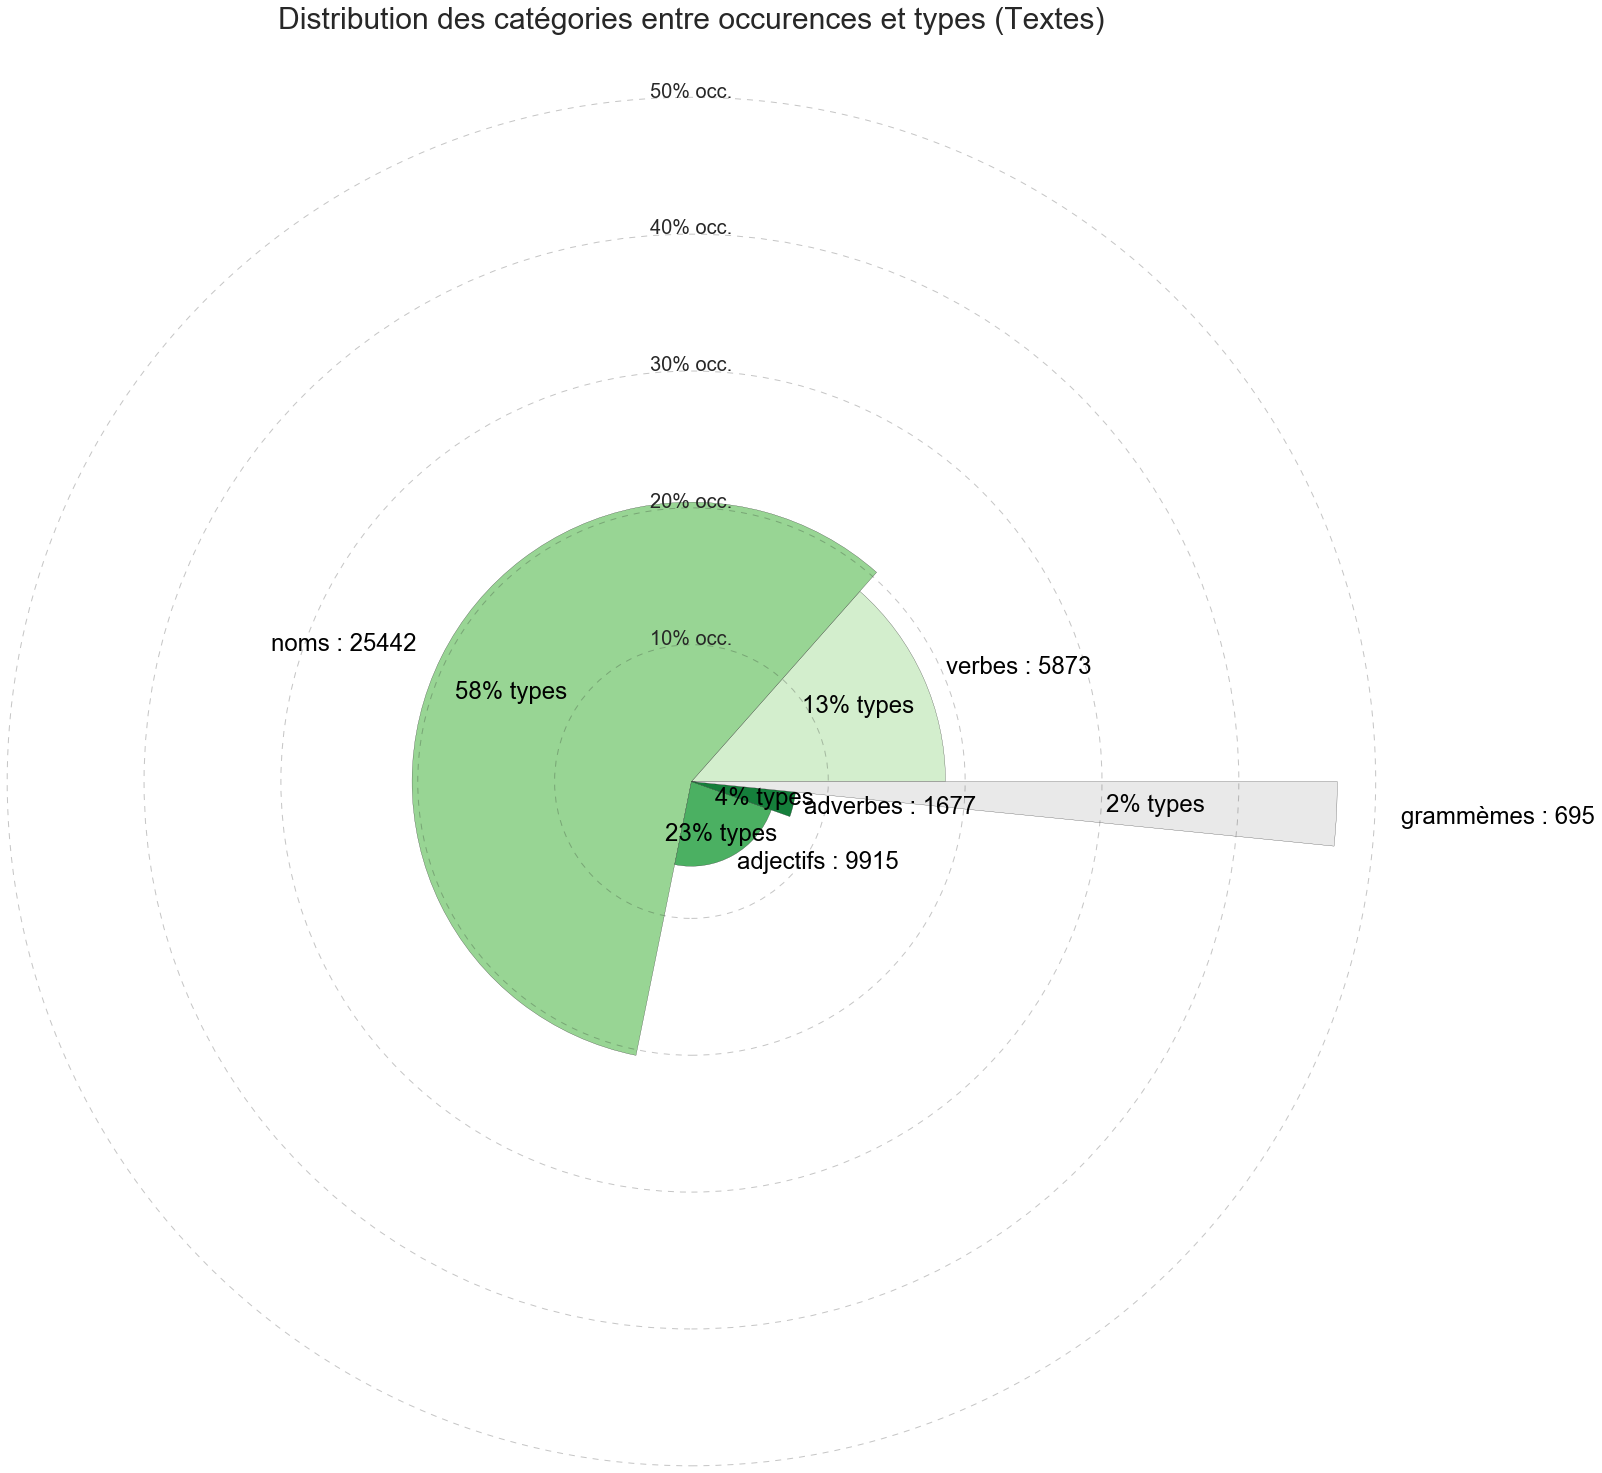

In [49]:
props=DFAY["prop"].tolist()
#lemmes=[7000,12000,7000,3500,50,150,250,50,100]
heights=[]
for n,p in enumerate(props):
    height=p*10
    print height
    heights.append(height)
    
ax=DFAY.plot(kind="pie",y="nbLemmes",figsize=(5,5),
             labels=['%s : %1d' % (l, s) for l, s in zip(DFAY.index, DFAY["nbLemmes"])],
#             labeldistance=5,
             autopct=lambda p: '%1d%% types'%round(p) if round(p) > 1 else '',
             startangle=0,
#             pctdistance = np.mean(heights), 
             textprops=dict(color="black",),
             colors=sns.color_palette("Greens", 4)+sns.color_palette("Greys", 5),
            )
for n,wedge in enumerate(ax.patches):
    wedge.set_radius(heights[n])
nTexte=0
labAdjust=1.
pctAdjust=1.2
for text in ax.texts:
    text.set_fontsize(24)
    if "%" not in text.get_text() and text.get_text()!="":
        x,y=text.get_position()
        text.set_position((x*heights[nTexte]*labAdjust,y*heights[nTexte]*labAdjust))
    elif text.get_text()!="":
        x,y=text.get_position()
        text.set_position((x*heights[nTexte]*pctAdjust,y*heights[nTexte]*pctAdjust))
        nTexte+=1
ax.get_legend().remove()
ax.axis('equal')
ax.annotate("10% occ.", xy=(0, 1), fontsize=20, ha="center",annotation_clip=False)
ax.annotate("20% occ.", xy=(0, 2), fontsize=20, ha="center",annotation_clip=False)
ax.annotate("30% occ.", xy=(0, 3), fontsize=20, ha="center",annotation_clip=False)
ax.annotate("40% occ.", xy=(0, 4), fontsize=20, ha="center",annotation_clip=False)
ax.annotate("50% occ.", xy=(0, 5), fontsize=20, ha="center",annotation_clip=False)
ax.annotate(u"Distribution des catégories entre occurences et types (Textes)", xy=(0, 5.5), fontsize=30, ha="center",annotation_clip=False)
#
# Attention :
#   Pour obtenir un cercle vide : fc="none", pas fc=None
#
circle1 = plt.Circle((0,0),1,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle2 = plt.Circle((0,0),2,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle3 = plt.Circle((0,0),3,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle4 = plt.Circle((0,0),4,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
circle5 = plt.Circle((0,0),5,color=None,fc="none", edgecolor='k',alpha=0.25,linewidth=1,clip_on=False,linestyle="--")
fig = plt.gcf()
fig.gca().add_artist(circle1)
fig.gca().add_artist(circle2)
fig.gca().add_artist(circle3)
fig.gca().add_artist(circle4)
fig.gca().add_artist(circle5)
plt.savefig(repHDR+u'Lex3-Categorie-PopulationFrequence-Textes.png', dpi=300, bbox_inches="tight")
plt.show()

#### Distribution de la fréquence des lexèmes dans Films

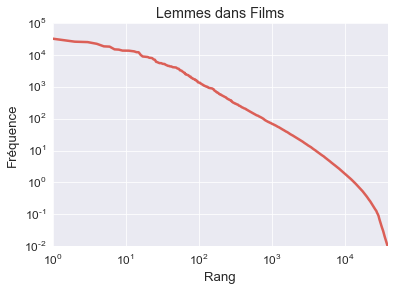

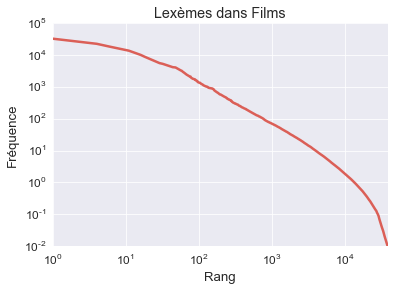

In [40]:
cgramLex=u"VER NOM ADJ ADV".split(" ")
ax=lex3Lemmes[lex3Lemmes["7_freqlemfilms2"]>0].sort_values("rangFL").set_index("rangFL")["7_freqlemfilms2"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title=u"Lemmes dans Films")
plt.show()
ax=lex3Lemmes[(lex3Lemmes["7_freqlemfilms2"]>0) &(lex3Lemmes["4_cgram"].isin(cgramLex))].sort_values("rangFL").set_index("rangFL")["7_freqlemfilms2"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title=u"Lexèmes dans Films")
plt.show()

#### Distribution de la fréquence des lexèmes dans Textes

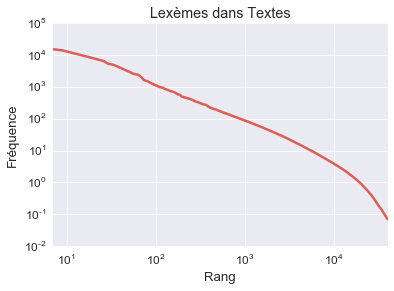

In [50]:
ax=lex3Lemmes[(lex3Lemmes["8_freqlemlivres"]>0)&(lex3Lemmes["4_cgram"].isin(cgramLex))].sort_values("rangTL").set_index("rangTL")["8_freqlemlivres"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title=u"Lexèmes dans Textes")
None

## Analyse de Verbes3

### Extraction des verbes de Lexique3

In [ ]:
lex3.rename(columns={'11_infover':'lex3_11_infover'}, inplace=True)

In [ ]:
verb3=lex3[lex3["4_cgram"].isin(["VER","AUX"])]

In [ ]:
verb3.loc[verb3["9_freqfilms2"]>0,"rangFWV"]=verb3.loc[verb3["9_freqfilms2"]>0,"9_freqfilms2"].rank(ascending=False)
verb3.loc[verb3["10_freqlivres"]>0,"rangTWV"]=verb3.loc[verb3["10_freqlivres"]>0,"10_freqlivres"].rank(ascending=False)
verb3.sort_values("rangTWV")

### Graphes Fréquence=f(Rang)

In [ ]:
ax=verb3[verb3["9_freqfilms2"]>0].sort_values("rangFWV").set_index("rangFWV")["9_freqfilms2"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title="Formes verbales dans Films")
None

In [ ]:
ax=verb3[verb3["10_freqlivres"]>0].sort_values("rangTWV").set_index("rangTWV")["10_freqlivres"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title="Formes verbales dans Textes")
None

#### Extraction des fréquences de lexèmes

In [ ]:
verb3Lemmes=verb3.drop_duplicates(subset=["3_lemme","4_cgram","7_freqlemfilms2","8_freqlemlivres"]).copy()
verb3Lemmes.loc[verb3Lemmes["7_freqlemfilms2"]>0,"rangFLV"]=verb3Lemmes.loc[verb3Lemmes["7_freqlemfilms2"]>0,"7_freqlemfilms2"].rank(ascending=False)
verb3Lemmes.loc[verb3Lemmes["8_freqlemlivres"]>0,"rangTLV"]=verb3Lemmes.loc[verb3Lemmes["8_freqlemlivres"]>0,"8_freqlemlivres"].rank(ascending=False)
verb3Lemmes.sort_values("rangTLV")

#### Distribution de la fréquence des lexèmes dans Films

In [ ]:
ax=verb3Lemmes[verb3Lemmes["7_freqlemfilms2"]>0].sort_values("rangFLV").set_index("rangFLV")["7_freqlemfilms2"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title=u"Lexèmes verbaux dans Films")
None

In [ ]:
ax=verb3Lemmes[verb3Lemmes["8_freqlemlivres"]>0].sort_values("rangTLV").set_index("rangTLV")["8_freqlemlivres"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title=u"Lexèmes verbaux dans Textes")
None

In [ ]:
pseudoZipfFilms=verb3Lemmes.sort_values("rangFLV").set_index("rangFLV")[["7_freqlemfilms2"]]
pseudoZipfLivres=verb3Lemmes.sort_values("rangTLV").set_index("rangTLV")[["8_freqlemlivres"]]

In [ ]:
pseudoZipfFilms=pseudoZipfFilms[pseudoZipfFilms["7_freqlemfilms2"]>0]
pseudoZipfFilms.drop_duplicates(inplace=True)
pseudoZipfFilms.reset_index(inplace=True)
pseudoZipfFilms

In [ ]:
pseudoZipfFilms["logFreq"]=pseudoZipfFilms["7_freqlemfilms2"].apply(math.log)
pseudoZipfFilms["logRank"]=pseudoZipfFilms["rangFLV"].apply(math.log)
coefs=[1.5,1.6,1.7,1.8,1.9]
for c in coefs:
    pseudoZipfFilms[c]=pseudoZipfFilms["logFreq"]+c*pseudoZipfFilms["logRank"]

In [ ]:
pseudoZipfFilms[coefs].plot()

# TESTS 
## Examen de la distribution des échantillons

In [ ]:
import pickle

In [ ]:
nomSample="/Volumes/gilles/Transfert/Copies-iMac-GB/2015-Data/Longitudinales/Longitudinal-55-T1100000-F41134.pkl"

In [ ]:
with open(nomSample,"rb") as input:
    dfSample=pickle.load(input)
dfSample["rang"]=dfSample.tir1.rank(ascending=False)

In [ ]:
ax=dfSample.sort_values("rang").set_index("rang")["tir1"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title=u"Formes verbales")
None

In [ ]:
lexemesSample=dfSample.groupby("lexeme")[["tir1"]].sum()
lexemesSample["rang"]=lexemesSample.tir1.rank(ascending=False)

In [ ]:
ax=lexemesSample.sort_values("rang").set_index("rang")["tir1"].plot()
ax.set(xscale="log",yscale="log",xlabel="Rang",ylabel=u"Fréquence",title=u"Verbes")
None

# Projet de thèse Gauvain

In [ ]:
lex3[lex3["7_freqlemfilms2"]>=.1].groupby("3_lemme").count()

In [ ]:
for seuil in [100, 10, 1, 0.1, 0.01]:
    print "seuil",seuil
    dfFilms=lex3[lex3["7_freqlemfilms2"]>=seuil].groupby("3_lemme")
    countFilms=dfFilms.count()
    print "\tFilms"
#    print "\tTextes",lex3[(lex3["8_freqlemlivres"]>=seuil)].groupby("3_lemme").count().shape
#    print "\tLex3",lex3[(lex3["7_freqlemfilms2"]>=seuil)|(lex3["8_freqlemlivres"]>=seuil)].groupby("3_lemme").count().shape

In [ ]:
lex3.groupby("3_lemme").count()

In [ ]:
lex3[(lex3["7_freqlemfilms2"]>100)].groupby("3_lemme").count().shape[0]

In [ ]:
lex3[lex3["7_freqlemfilms2"]>=10].groupby("3_lemme").count().shape[0]

In [ ]:
lex3[lex3["7_freqlemfilms2"]>=1].groupby("3_lemme").count().shape[0]

In [ ]:
lex3[lex3["7_freqlemfilms2"]>=0.1].groupby("3_lemme").count().shape[0]

In [ ]:
lex3[lex3["7_freqlemfilms2"]>=0.01].groupby("3_lemme").count().shape[0]

In [ ]:
lex3[(lex3["8_freqlemlivres"]>100)].groupby("3_lemme").count().shape[0]

In [ ]:
lex3[(lex3["8_freqlemlivres"]>10)].groupby("3_lemme").count().shape[0]

In [ ]:
lex3[(lex3["8_freqlemlivres"]>1)].groupby("3_lemme").count().shape[0]

In [ ]:
lex3[(lex3["8_freqlemlivres"]>0.1)].groupby("3_lemme").count().shape[0]

In [ ]:
lex3[(lex3["8_freqlemlivres"]>0.01)].groupby("3_lemme").count().shape[0]

# Hart & Risley
Dans leur étude, Hart et Risley proposent que l'exposition des enfants varient d'un milieu social à un autre en terme de mots adressés à l'enfant entre 600 et 2000 mots par heure avec 5 heures de communication par jour.

Avec cet ordre de grandeur, on peut estimer une fourchette du nombre de tokens perçu au cours du temps :
 - fourchette basse : 150M de mots en 12 ans
 - fouchette haute : 520M de mots en 12 ans

In [ ]:
def roundElement(x,nbRound=2):
    text="0"
    if nbRound==1:
        round1="%f"
        round2="%.1f"
    elif nbRound==2:
        round1="%.1f"
        round2="%.2f"        
    if x!=0:
        magnitude=int(np.log10(x))
        x=round(float(x)/(10**magnitude),nbRound)*10**magnitude
        if magnitude>9:
            unit="G"
            value=(round1%(float(x)/1e9)).strip("0").strip(".")
        elif magnitude==9:
            unit="G"
            value=(round2%(float(x)/1e9)).strip("0").strip(".")
        elif magnitude>6:
            unit="M"
            value=(round1%(float(x)/1e6)).strip("0").strip(".")
        elif magnitude==6:
            unit="M"
            value=(round2%(float(x)/1e6)).strip("0").strip(".")
        elif magnitude>3:
            unit="k"
            value=(round1%(float(x)/1e3)).strip("0").strip(".")
        elif magnitude==3:
            unit="k"
            value=(round2%(float(x)/1e3)).strip("0").strip(".")
        elif magnitude>0:
            unit=""
            value=(round1%float(x)).strip("0").strip(".")
        else:
            unit=""
            value=x
        text="%s%s"%(value,unit)
    return text


In [ ]:
def roundTable(series,nbRound=2):
    result=series.copy()
    for ix,el in result.iteritems():
        result.loc[ix]=roundElement(el,nbRound)
    return result

In [ ]:
estBasse=600
estHaute=2000
journee=5
periode=journee*30
nbPoints=12*12
serieBasse=[i*periode*estBasse for i in range(nbPoints)]
serieHaute=[i*periode*estHaute for i in range(nbPoints)]
#print serieBasse,serieHaute
serieRnd=[]
sumRnd=0
for i in range(nbPoints):
    serieRnd.append(sumRnd)
    rnd=np.random.rand()
    elementRnd=estBasse*periode*rnd+estHaute*periode*(1-rnd)
    sumRnd+=elementRnd
estimationsHR=pd.DataFrame(serieBasse,columns=["basse"])
estimationsHR["haute"]=serieHaute
estimationsHR["rnd"]=serieRnd
estimationsHR=estimationsHR[["haute","rnd","basse"]]
ax=estimationsHR.plot(kind="line",title=u"Nombre de tokens",figsize=(12,5))
ax.set(yscale="linear",
       xlabel=u"nombre d'années",ylabel=u"nombre de tokens",title=u"Évolution du nombre de tokens rencontrés"
      )

ax.xaxis.set_ticks(np.linspace(0,144,num=13))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(Mois2Annees))

ax.yaxis.set_ticks(np.linspace(0,60000000,num=13))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
plt.show()

sampleAnnees=[(i+1)*12-1 for i in range(12)]
print estimationsHR.loc[sampleAnnees,:].apply(lambda x: roundTable(x,1)).T.to_latex()

# Tests de correspondances entre tokens et vocabulaire

Il faut faire le calcul au niveau des formes et des lemmes. Pour les lemmes, on peut faire une estimation du pourcentage d'une catégorie par tranche de facteur 10 et de même pour les formes :
- verbes :
 - formes : 
 - lemmes : .21,.27,.19,.13,.13
  - la queue de la distribution est problématique...
- noms :
 - formes : 
 - lemmes :
- adjectifs :
 - formes : 
 - lemmes :



In [ ]:
def getCatSize(catDist,uniques):
    result=0
    for u in sorted(uniques):
        if u<=100:
            if np.random.rand()<=catDist[0]:
                result+=1
        elif u<=1000:
            if np.random.rand()<=catDist[1]:
                result+=1
        elif u<=10000:
            if np.random.rand()<=catDist[2]:
                result+=1
        elif u<=100000:
            if np.random.rand()<=catDist[3]:
                result+=1
        elif u<=1000000:
            if np.random.rand()<=catDist[4]:
                result+=1
    return result

In [ ]:
def getZipfSizeTable(coefs,tokenNumbers,catDist=None):
    locCatZipfSizes={}
    locZipfSizes={}
    for coef in coefs:
        if coef not in locZipfSizes:
            locZipfSizes[coef]={}
            locCatZipfSizes[coef]={}
        for nbTokens in tokenNumbers:
            zipf=np.random.zipf(coef,nbTokens)
            uniques=np.unique(zipf)
            zipfSize=len(uniques)
            locZipfSizes[coef][nbTokens]=zipfSize
            if catDist:
                catSize=getCatSize(catDist,uniques)
                locCatZipfSizes[coef][nbTokens]=catSize
            else:
                catSize=1
            print coef,math.log(nbTokens,10),math.log(zipfSize,10), math.log(catSize,10)
            print datetime.now().strftime('%H:%M:%S') 
    return locZipfSizes,locCatZipfSizes

In [ ]:
testTirages=int("10 000 000 000")
testCoef=1.2
testZipf=np.random.zipf(testCoef,testTirages)

In [ ]:
uniques,counts=np.unique(testZipf,return_counts=True)

In [ ]:
testTypes=0
testTokens=0
catDist=catDistMots["verbes"]
for nU,u in enumerate(uniques):
    if u<=100:
        if np.random.rand()<=catDist[100]/100.:
            testTypes+=1
            testTokens+=counts[nU]
    elif u<=1000:
        if np.random.rand()<=catDist[1000]/1000.:
            testTypes+=1
            testTokens+=counts[nU]
    elif u<=10000:
        if np.random.rand()<=catDist[10000]/10000.:
            testTypes+=1
            testTokens+=counts[nU]
    elif u<=100000:
        if np.random.rand()<=catDist[100000]/100000.:
            testTypes+=1
            testTokens+=counts[nU]
    elif u<=1000000:
        if np.random.rand()<=catDist[1000000]/1000000.:
            testTypes+=1
            testTokens+=counts[nU]
testTypes,testTokens, float(testTokens)/testTirages

In [ ]:
float(testTokens)/1000000000

In [ ]:
coefs=[1+(i+1)/100. for i in range(20)]
tokenNumbers=[int(1E5*(i+1)) for i in range(9)]+[int(1E6*(i+1)) for i in range(9)]+[int(1E7*(i+1)) for i in range(9)]+[int(1E8*(i+1)) for i in range(5)]

In [ ]:
catDistMots={}
catDistLemmes={}
for c in categories:
    print c
    catDistMots[c]={}
    catDistLemmes[c]={}
    sPrevMots=0
    sPrevLemmes=0
    for i in range(1,7):
        sNowMots=lex3[(lex3["4_cgram"].isin(cgrams[c]))&(lex3["9_freqfilms2"]>0)&(lex3["rangFW"]<=10**(i+1))].count()["1_ortho"]
        print "W",10**(i+1),sNowMots-sPrevMots,(sNowMots-sPrevMots)/10.**(i+1)*100
        catDistMots[c][10**(i+1)]=(sNowMots-sPrevMots)#/10.**(i+1)*100
        sPrevMots=sNowMots
        sNowLemmes=lex3Lemmes[(lex3Lemmes["4_cgram"].isin(cgrams[c]))&(lex3Lemmes["7_freqlemfilms2"]>0)&(lex3Lemmes["rangFL"]<=10**(i+1))].count()["1_ortho"]
        print "L",10**(i+1),sNowLemmes-sPrevLemmes,(sNowLemmes-sPrevLemmes)/10.**(i+1)*100
        catDistLemmes[c][10**(i+1)]=(sNowLemmes-sPrevLemmes)#/10.**(i+1)*100
        sPrevLemmes=sNowLemmes        

In [ ]:
dfCatDistMots=pd.DataFrame.from_dict(catDistMots)[categories].T
dfCatDistMots=dfCatDistMots.append(dfCatDistMots.loc[['pronoms', u'déterminants',u'prépositions',u"conjonctions",u"autres"]].sum(), ignore_index=True).drop(dfCatDistMots.index.get_indexer(['pronoms', u'déterminants',u'prépositions',u"conjonctions",u"autres"]))
dfCatDistMots.index=u"verbes noms adjectifs adverbes grammèmes".split(" ")
dfCatDistMots.drop([10000000],axis=1,inplace=True)
print dfCatDistMots.T.sum().to_latex()

In [ ]:
for trancheRang in dfCatDistMots.columns.tolist():
    ax=dfCatDistMots[dfCatDistMots[trancheRang]>0].plot(kind="pie",y=trancheRang,#figsize=(5,5),
                 autopct=lambda p: '%1d%%'%round(p) if round(p) > 1 else '',
                 pctdistance = 0.75, 
                 textprops=dict(color="black",),
                 colors=sns.color_palette("Greens", 4)+sns.color_palette("Greys", 5),
                      )

    for text in ax.texts:
        if "%" in text.get_text():
            text.set_color('k')
    #ax.set_title(u"Nombre d'occurrences",y=1.05)
    ax.axis('equal')
    ax.set(ylabel="")
    ax.get_legend().remove()
    #ax.legend(labels=DFAX.index,
    #          title=u"Catégories",
    #          loc="center right",
    #          bbox_to_anchor=(.75, 0, 0.5, 1))
    plt.tight_layout()
    plt.savefig(repHDR+u'Lex3-FrequenceCategorie-Mots-%d.png'%trancheRang, dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
dfCatDistLemmes=pd.DataFrame.from_dict(catDistLemmes)[categories].T
dfCatDistLemmes=dfCatDistLemmes.append(dfCatDistLemmes.loc[['pronoms', u'déterminants',u'prépositions',u"conjonctions",u"autres"]].sum(), ignore_index=True).drop(dfCatDistLemmes.index.get_indexer(['pronoms', u'déterminants',u'prépositions',u"conjonctions",u"autres"]))
dfCatDistLemmes.index=u"verbes noms adjectifs adverbes grammèmes".split(" ")
dfCatDistLemmes.drop([1000000,10000000],axis=1,inplace=True)
print dfCatDistLemmes.T.sum().to_latex()

In [ ]:
lex3Paradigmes=pd.DataFrame([dfCatDistLemmes.T.sum(),dfCatDistMots.T.sum()]).T
lex3Paradigmes.columns=u"lemmes formes".split(" ")
lex3Paradigmes["P1"]=[51,2,4,0,0]
lex3Paradigmes=lex3Paradigmes.T[u"verbes noms adjectifs".split(" ")].T
lex3Paradigmes["P2"]=lex3Paradigmes["lemmes"]*lex3Paradigmes["P1"]
lex3Paradigmes["remplissage"]=lex3Paradigmes["formes"]/lex3Paradigmes["P2"].astype(float)*100

In [ ]:
print lex3Paradigmes.apply(lambda x: roundTable(x,2)).to_latex(decimal=",",float_format="%.1f%%")
print lex3Paradigmes.to_latex(decimal=",",float_format="%.1f%%")

In [ ]:
for trancheRang in dfCatDistLemmes.columns.tolist():
    ax=dfCatDistLemmes[dfCatDistLemmes[trancheRang]>0].plot(kind="pie",y=trancheRang,#figsize=(5,5),
                 autopct=lambda p: '%1d%%'%round(p) if round(p) > 1 else '',
                 pctdistance = 0.75, 
                 textprops=dict(color="black",),
                 colors=sns.color_palette("Greens", 4)+sns.color_palette("Greys", 5),
                      )

    for text in ax.texts:
        if "%" in text.get_text():
            text.set_color('k')
    #ax.set_title(u"Nombre d'occurrences",y=1.05)
    ax.axis('equal')
    ax.set(ylabel="")
    ax.get_legend().remove()
    #ax.legend(labels=DFAX.index,
    #          title=u"Catégories",
    #          loc="center right",
    #          bbox_to_anchor=(.75, 0, 0.5, 1))
    plt.tight_layout()
    plt.savefig(repHDR+u'Lex3-FrequenceCategorie-Lemmes-%d.png'%trancheRang, dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
lex3Lemmes[(lex3Lemmes["4_cgram"].isin(cgramV))&(lex3Lemmes["7_freqlemfilms2"]>0)&(lex3Lemmes["rangFL"]<=100000)].count()

In [ ]:
vCatDistLemmes=[.21,.27,.19,.03,.001]
vCatDistMots=[.24,.367,.37,.402,.048]

In [ ]:
#coefs=[1.25,1.53,1.89,2.09]
coefs=[1.15,1.32,1.86,4.29]
tokenNumbers=[int(1E3*(i+1)) for i in range(9)]+[int(1E4*(i+1)) for i in range(9)]+[int(1E5*(i+1)) for i in range(9)]+[int(1E6*(i+1)) for i in range(9)]+[int(1E7*(i+1)) for i in range(9)]+[int(1E8*(i+1)) for i in range(5)]
dictZipfSize,dictCatZipfSizeMots=getZipfSizeTable(coefs,tokenNumbers,catDist=vCatDistMots)

In [ ]:
#samples=[1.8,1.9,2.0,2.1,2.2]
#samples=[1+(i+1)/100. for i in range(5)]
samples=[1.15,1.32,1.86,4.29]
dfZipfSizes=pd.DataFrame.from_dict(dictZipfSize)
ax=dfZipfSizes.iloc[:32][samples].plot(figsize=(6,4),)
ax.set(yscale="log",
       xlabel=u"nombre de tokens",ylabel=u"nombre de types",
      )
ax.xaxis.set_ticks(np.linspace(10000,50000000,num=6))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.yaxis.set_ticks(np.logspace(1,8,num=8))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
plt.legend(bbox_to_anchor=(1.35, 1),title="coefficients Zipf")
plt.savefig(repHDR+u'Zipf-CoefTokens-Types.png', dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
np.logspace(1,9,num=9)

In [ ]:
display(dfZipfSizes.iloc[:5,:2])
display(dfZipfSizes.iloc[5:10,1:3])
display(dfZipfSizes.iloc[10:,2:4])

In [ ]:
latexZipfSizes=dfZipfSizes.iloc[:,:].apply(roundTable)
latexZipfSizes.index=roundTable(pd.Series(latexZipfSizes.index))
print latexZipfSizes.to_latex()

# Approximation de la distribution par morceaux
La distribution des fréquences dans Lexique3 ne correspond pas à une zipf uniforme. Pour approcher de cette distribution, on coupe la distribution en morceaux et on cherche la zipf la plus proche pour chaque morceau.

Le calcul des coefficients est fait par régression linéaire sur la correspondance entre le log du rang et le log de la fréquence pour chaque plage. Les coefficients varie de 1.25 pour la tête de la distribution à 2.09 pour la queue.

In [ ]:
lex3["rangFW"].max()

In [ ]:
testRangMin=0
testRangMax=100000
testDF=lex3[(lex3["rangFW"]>=testRangMin)&(lex3["rangFW"]<testRangMax)].sort_values("rangFW").set_index("rangFW")[["9_freqfilms2"]].reset_index()
testDF["logR"]=np.log10(testDF["rangFW"])
testDF["logF"]=np.log10(testDF["9_freqfilms2"])
testDF=testDF[["logR","logF"]]
testDF[["logR","logF"]].describe()

X = testDF.iloc[:, :-1].values  
y = testDF.iloc[:, 1].values  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
X_train,y_train

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor.intercept_)  
print(regressor.coef_)  


ax=testDF.plot(x="logR",y="logF",figsize=(5,5))
x = np.linspace(0,np.log10(testRangLimite),100)
y = regressor.coef_*x+regressor.intercept_
plt.plot(x, y, ':b', label='y=2x+1')

y_pred = regressor.predict(X_test)

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  



In [ ]:
dfZipfSizes["cumul"]=0

In [ ]:
def cumulerZipf(df,ix1,ix2,c1,c2,ajoutCumul=0):
    if ix1==0:
        lAjout=0
        lIntervalle=(df.index>=ix1)&(df.index<ix2)
        df.loc[lIntervalle,"cumul"]=df.loc[lIntervalle,c2]
#        display(df)
    else:
        lAjout=df[df.index==ix1][c1].values[0]-df[df.index==ix1][c2].values[0]
        ajoutCumul+=lAjout
        lIntervalle=(df.index>=ix1)&(df.index<ix2)
        df.loc[lIntervalle,"cumul"]=df.loc[lIntervalle,c2]+ajoutCumul
#        display(df)
    return ajoutCumul

# cumul500=dfZipfSizes[dfZipfSizes.index==500000][1.25].values[0]-dfZipfSizes[dfZipfSizes.index==500000][1.53].values[0]
# dfZipfSizes.loc[(dfZipfSizes.index>=500000)&(dfZipfSizes.index<1000000),"cumul"]=dfZipfSizes.loc[(dfZipfSizes.index>=500000)&(dfZipfSizes.index<1000000),1.53]+cumul500
# cumul1000=dfZipfSizes[dfZipfSizes.index==1000000][1.53].values[0]-dfZipfSizes[dfZipfSizes.index==1000000][1.89].values[0]+cumul500
# dfZipfSizes.loc[(dfZipfSizes.index>=1000000)&(dfZipfSizes.index<10000000),"cumul"]=dfZipfSizes.loc[(dfZipfSizes.index>=1000000)&(dfZipfSizes.index<10000000),1.89]+cumul1000
# cumul10000=dfZipfSizes[dfZipfSizes.index==1000000][1.53].values[0]-dfZipfSizes[dfZipfSizes.index==1000000][1.89].values[0]+cumul1000
# dfZipfSizes.loc[(dfZipfSizes.index>=1000000)&(dfZipfSizes.index<10000000),"cumul"]=dfZipfSizes.loc[(dfZipfSizes.index>=1000000)&(dfZipfSizes.index<10000000),1.89]+cumul10000
# cumul100000=dfZipfSizes[dfZipfSizes.index==10000000][1.89].values[0]-dfZipfSizes[dfZipfSizes.index==10000000][2.09].values[0]+cumul10000
# dfZipfSizes.loc[(dfZipfSizes.index>=10000000)&(dfZipfSizes.index<100000000),"cumul"]=dfZipfSizes.loc[(dfZipfSizes.index>=10000000)&(dfZipfSizes.index<100000000),2.09]+cumul100000


In [ ]:
tranchesCoef=[(0,0),(1.15,30000),(1.32,1000000),(1.86,10000000),(4.29,100000000),(4.29,100000000)]
ajoutCumul=0
for i in range(len(tranchesCoef)-1):
    ajoutCumul=cumulerZipf(dfZipfSizes,tranchesCoef[i][1],tranchesCoef[i+1][1],tranchesCoef[i][0],tranchesCoef[i+1][0],ajoutCumul)
dfZipfSizes

In [ ]:
dfZipfSizes.loc[0,:]=0
dfZipfSizes.sort_index(inplace=True)
dfDiff=dfZipfSizes[[1.15,1.32,1.86,4.29]].diff()
dfDiff["cumul"]=dfZipfSizes["cumul"]
dfDiff.index=roundTable(pd.Series(dfDiff.index))
print dfDiff.iloc[1:].apply(roundTable).to_latex()

In [ ]:
ax=dfZipfSizes.iloc[:-3]["cumul"].plot(figsize=(6,3),color="g")
ax.xaxis.set_ticks(np.linspace(0,200000000,num=11))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.set(xlabel="nombre d'occurences",ylabel="nombre de types")
plt.show()
ax=dfZipfSizes.iloc[:10][[1.25,1.53,"cumul"]].plot()
#ax.xaxis.set_ticks(np.linspace(0,200000000,num=11))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
ax.set(xlabel="nombre d'occurences",ylabel="nombre de types")
plt.show()


In [ ]:
samples=[1.8,1.9,2.0,2.1,2.2]
samples=[1+(4*i+1)/100. for i in range(5)]
samples=[1.25,1.53,1.89,2.09]
dfCatZipfSizes=pd.DataFrame.from_dict(dictCatZipfSizeMots)
ax=dfCatZipfSizes[samples].plot(figsize=(8,4))
#ax.set(yscale="log")
ax.xaxis.set_ticks(np.linspace(0,500000000,num=11))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reFormatTicks))
plt.savefig(repHDR+u'Zipf-CoefTokens-Verbes.png', dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
roundElement(1453.756468)

In [ ]:
print dfZipfSizes.loc[100000000:,samples].apply(roundTable).to_latex()

In [ ]:
print dfCatZipfSizes.loc[100000000:,samples].apply(roundTable).to_latex()

In [ ]:
dfZipfSizes.to_csv(path_or_buf="ZipfCoefTokensTypes.csv",sep="\t",encoding="utf8")
dfCatZipfSizes.to_csv(path_or_buf="ZipfCoefTokensTypes-Verbes.csv",sep="\t",encoding="utf8")

In [ ]:
testTokens=1000
test=np.random.zipf(1.3,testTokens)
len(test[test>1000000])/float(testTokens)